In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
from src.utils import get_device

get_device(use_accelerators=False)

'cpu'

In [2]:
from src.create_data import simulate_demag

data = simulate_demag(1, 1, 0.1)

Meshing magnet and applying demag effects
2024-11-07 at 14:57:32 |   INFO   | run | {} ℹ️ Start Demagnetization of Collection_01 with 100 cells - Counter({'Cuboid': 100})
2024-11-07 at 14:57:32 | SUCCESS  | timelog | {} ✅  Demagnetization of Collection_01 with 100 cells - Counter({'Cuboid': 100}) done 🕑 1.019sec
Creating measurement grid
Calculating analytical B-field
Calculating demag B-field
Calculating reduced field


In [3]:
B_demag = data["grid_field"]
B_ana = data["grid_field_ana"]
grid = data["grid"]
a = data["a"]
b = data["b"]
chi = data["chi"]
demag_factor= data["demagnetization_factor"]
B_reduced = data["grid_field_reduced"]

In [4]:
values = B_demag[:,2]

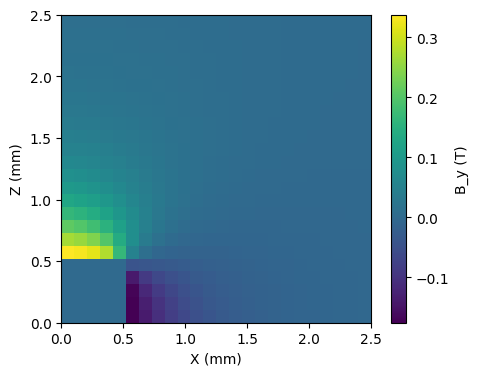

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = grid.T[0]
y = grid.T[1]
z = grid.T[2]

tolerance = 0.0000001  # Adjust this value as needed

# Filter points where y is approximately 0
mask = np.abs(y) < tolerance
x_slice = x[mask]
z_slice = z[mask]
values_slice = values[mask]
# Create grid for x and z
x_bins = np.linspace(min(x_slice), max(x_slice), 25)
z_bins = np.linspace(min(z_slice), max(z_slice), 25)

# Create a 2D histogram of the values without interpolation
heatmap, x_edges, z_edges = np.histogram2d(
    x_slice, z_slice, bins=[x_bins, z_bins], weights=values_slice
)
heatmap_counts, _, _ = np.histogram2d(x_slice, z_slice, bins=[x_bins, z_bins])

# Avoid division by zero for empty cells
heatmap = np.divide(heatmap, heatmap_counts, where=heatmap_counts != 0)

# Plot the heatmap
plt.figure(figsize=(5, 4))
plt.pcolormesh(x_edges, z_edges, heatmap.T, shading="auto", cmap="viridis")
plt.colorbar(label="B_y (T)")
plt.xlabel("X (mm)")
plt.ylabel("Z (mm)")
plt.title("")
plt.show()